Imports

In [158]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

Dataset

In [159]:
X_np, y_np = datasets.make_regression(n_samples =1000, n_features = 1, noise = 20, random_state=1)

X = torch.from_numpy(X_np.astype(np.float32))
y = torch.from_numpy(y_np.astype(np.float32))

In [160]:
y = y.reshape(y.shape[0],-1)
m,n_features = X.shape

Model

In [161]:
input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)

Loss and optimiser

In [162]:
loss_criterion = nn.MSELoss()
optimiser = torch.optim.SGD(model.parameters(), lr = .1)

Training loop

In [163]:
n_iterations = 100

for epoch in range(n_iterations):
    y_hat = model(X)
    loss= loss_criterion(y_hat, y)
    
    loss.backward()
    optimiser.step()
    optimiser.zero_grad()
    
    if epoch%10 == 0:
        [w,b] = model.parameters()
        print(f"Epoch: {epoch+1}  loss:{loss}  weight:{w[0].item()}")

Epoch: 1  loss:1804.5413818359375  weight:7.532245635986328
Epoch: 11  loss:420.88458251953125  weight:34.6417121887207
Epoch: 21  loss:401.86090087890625  weight:37.82844543457031
Epoch: 31  loss:401.59027099609375  weight:38.20635223388672
Epoch: 41  loss:401.5862731933594  weight:38.25152587890625
Epoch: 51  loss:401.5862121582031  weight:38.2569580078125
Epoch: 61  loss:401.5862121582031  weight:38.25761795043945
Epoch: 71  loss:401.5862121582031  weight:38.25769805908203
Epoch: 81  loss:401.5862121582031  weight:38.2577018737793
Epoch: 91  loss:401.5862121582031  weight:38.2577018737793


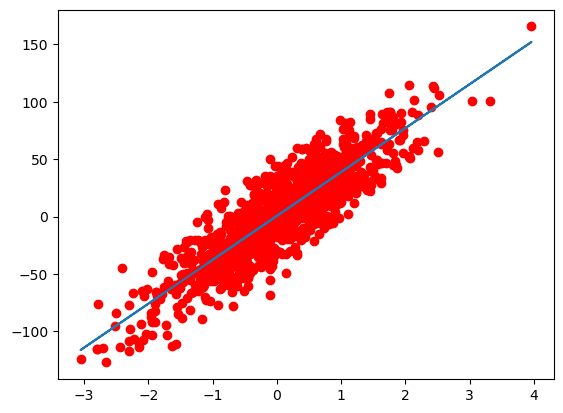

In [164]:
plt.plot(X,y,'ro')
plt.plot(X,model(X).detach().numpy())
plt.show()

In [165]:
X_train = torch.tensor([0.1], dtype = torch.float32)
print(model(X_train).item())

4.406770706176758
